<a href="https://colab.research.google.com/github/spikol/mmla/blob/main/nb_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Naive Bayes Classifier
Borrowed from this awesome [tutorial](https://medium.com/analytics-vidhya/naive-bayes-classification-aa381b00dd45)!

Naive Bayes is a supervised learning classification. It is a probabilistic classifier based on Bayes theorem. The name naive stems from the fact that classifier assumes that pairs of features are independent, thus significantly simplifying the model parameters are training requirements. This simplifies the computation that’s why it is called as ‘naive’. This is also called as class independence.


#### Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


#### Loading in the PELARS data set

Checking the data and some pre-processing if needed.

In [2]:
col_names = ['session', 'time', 'distance', 'per', 'hand', 'num', 'audio', 'ide', 'label']
# load dataset
url='https://raw.githubusercontent.com/spikol/mmla/main/data_halfway_01.csv'
#skip first row in csv since column labels
pelars = pd.read_csv(url, header=0, names=col_names)
pelars = pelars.drop(['time'],axis=1)  #Dropping unncessary columns
pelars.head()  #Displaying first five rows of the dataset
#Preprocessing
#pelars.isnull().sum()
pelars.shape #shape of the data frame
#pelars.info()

(36, 8)

####Data Visualization:
It aims to communicate data clearly & efficiently through graphical representation.

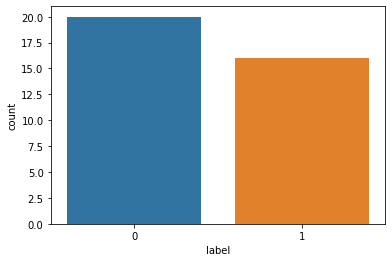

In [3]:
sns.countplot(x='label',data=pelars)

#### Adjusting what Features to use 
Drop columns and see what happens to the classification

In [4]:
#pelars = pelars.drop(['distance','per','num','audio','ide'],axis=1)  #Dropping unncessary columns

### Training and Testing the data

In [5]:
X=pelars.drop('label',axis=1)
y=pelars['label']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

#### Apply the Naive Bayes theorem

In [6]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

####Compare the actual status and predicted status

In [7]:
y_pred=model.predict(X_test)
df1=pd.DataFrame({'Actual Status':y_test,'Predicted Status':y_pred})
df1

,Actual Status,Predicted Status
30,1,1
34,1,1
28,1,1
3,0,0
19,0,0
17,0,0
21,1,1
23,1,1
29,1,0
26,1,1


####Classification Report:
A Classification report is used to measure the quality of predictions from a classification algorithm.

In [11]:

print(classification_report(y_test, y_pred))
with open('sample_data/Example2.txt', 'a') as testwritefile:
  testwritefile.write("------------------------------------------------------ D\n")
  testwritefile.write(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       1.00      0.88      0.93         8

    accuracy                           0.91        11
   macro avg       0.88      0.94      0.90        11
weighted avg       0.93      0.91      0.91        11



####Confusion Matrix:
A confusion matrix is a summary of prediction results on a classification problem. The number of correct and incorrect predictions are summarized with count values and broken down by each class.

In [9]:
print(confusion_matrix(y_test,y_pred))

[[3 0]
 [1 7]]


#### Accuracy score

In [10]:
print(accuracy_score(y_test,y_pred)*100)

90.9090909090909
